# Predicting Customer Satisfaction Level from Santander 

This project is on the kaggle platform (link in cell below). The dataset is anonymized and consists of a large number of numeric variables.

https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
# Importing libraries and frameworks

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import scipy.stats 
from sklearn.feature_selection import VarianceThreshold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Normalizer 
from sklearn.feature_selection import SelectPercentile 
from sklearn.feature_selection import f_classif,chi2 
from sklearn.preprocessing import Binarizer, scale
import warnings
warnings.filterwarnings("ignore")

## Importing dataset

In [2]:
# Importing train data
df_train = pd.read_csv("data/train.csv")
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
# Importing test data
df_data_test = pd.read_csv("data/test.csv")
df_result_test = pd.read_csv("data/sample_submission.csv")
df_test = df_data_test.merge(df_result_test, on = 'ID')
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10,0
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72,0
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95,0
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61,0
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73,0


"var3" seens to be customers nationality. -999999 value indicate an  unknown customer nationality. So I checked for missing values and replaced it.

## Exploratory Analysis and Feature Engineering

In [7]:
# Getting top-10 most common values 
print(df_train.var3.value_counts()[:10]) 
 
# There are 116 missing values. 
print("\nmissing values: ", len(df_train.loc[df_train.var3==-999999])) 
 
# Replacing missing values (-999999) by most common value 2 
df_train.var3 = df_train.var3.replace(-999999,2)
df_test.var3 = df_test.var3.replace(-999999,2)

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64

missing values:  0


In [8]:
# Saving dataset 
df_train.to_csv("data/df_train.csv", index=False) 
df_test.to_csv("data/df_test.csv", index=False)

In [9]:
# Checking for missing values
print(pd.isna(df_train).any().any())
print(pd.isna(df_test).any().any())
print(pd.isnull(df_train).any().any())
print(pd.isnull(df_test).any().any())

False
False
False
False


#### Checking customer satisfation variable distrbution and proportions.

,counts,freqs
categories,,
0,73012,0.960431
1,3008,0.039569


Text(0.5, 1.0, 'TARGET barplot')

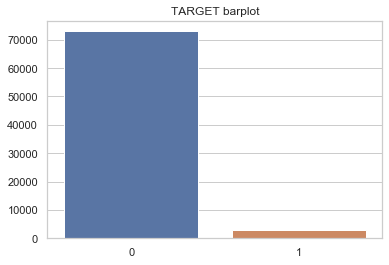

In [10]:
# TARGET values and proportion 
df = pd.DataFrame(pd.Categorical(df_train.TARGET).describe()) 
display(df)
 
# TARGET variable barplot 
sns.set(style="whitegrid") 
sns.barplot(x=[0,1], y=df_train.TARGET.value_counts().values).set_title('TARGET barplot')

As noticed on table and graph above, customer satisfaction feature is unbalanced. Less than 4% of customers are unhappy with banking services and about 96% of customers are satisfied.

#### Number of bank products ("var4" )
"var4" is supposed to be the number of bank customers for each customer. So I analysed var4 distribution and relation to customers satisfaction.

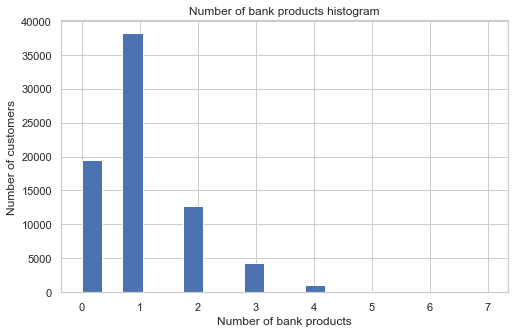

In [11]:
# num_var4 distribution 
plt.figure(figsize=(8,5)) 
df_train.num_var4.hist(bins=20) 
plt.xlabel('Number of bank products') 
plt.ylabel('Number of customers') 
plt.title('Number of bank products histogram') 
plt.show()

As noticed above, most customers have one banking product.

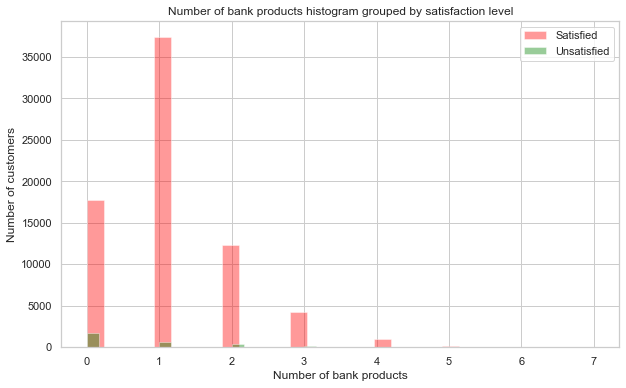

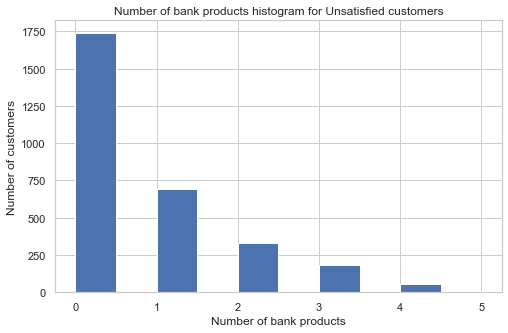

In [12]:
# Checking number of bank products distribution grouped by satisfaction level 
# Plotting number of bank products distribution grouped by satisfaction level 
plt.figure(figsize=(10,6)) 
sns.distplot(df_train[df_train.TARGET == 0]['num_var4'], color='red', kde=False, label='Satisfied', bins = 30) 
sns.distplot(df_train[df_train.TARGET == 1]['num_var4'], color='green', kde=False, label='Unsatisfied', bins = 30) 
plt.legend() 
plt.title('Number of bank products histogram grouped by satisfaction level') 
plt.xlabel('Number of bank products') 
plt.ylabel('Number of customers') 
plt.show() 
 
# Checking number of bank products distribution for unsatisfield customers 
plt.figure(figsize=(8,5)) 
df_train[df_train.TARGET==1].num_var4.hist(bins=10) 
plt.xlabel('Number of bank products') 
plt.ylabel('Number of customers') 
plt.title('Number of bank products histogram for Unsatisfied customers') 
plt.show()

The graphs above showed that unsatisfied customers have less products.

### Removing duplicated features

I eliminated the duplicate columns applying drop_duplicates function to pandas in the transposed dataframe.

In [13]:
df_no_duplicate_train = df_train.T.drop_duplicates(keep='first').T 
df_no_duplicate_test = df_test[list(df_no_duplicate_train.columns)] 
 
# Saving dataset 
df_no_duplicate_train.to_csv("data/df_no_duplicate_train.csv", index=False) 
df_no_duplicate_test.to_csv("data/df_no_duplicate_test.csv", index=False)

### Applying more filters to features

### Removing constant and Quasi-Constant Features Using Variance Threshold

I removed constant and quasi-constant variables from my dataset using variance threshhold.

In [23]:
# Removing quasi-constant columns
constant_filter = VarianceThreshold(threshold=0.01) 
constant_filter.fit(df_no_duplicate_train.drop("TARGET", axis=1))

filtered_columns = [column for column in df_no_duplicate_train.drop("TARGET", axis=1) \
                    .columns if column not in df_no_duplicate_train.drop("TARGET", axis=1) \
                    .columns[constant_filter.get_support()]]


df_filtered_train = df_no_duplicate_train.drop(filtered_columns, axis=1)
df_filtered_test = df_no_duplicate_test.drop(filtered_columns, axis=1)

# Saving dataset 
df_filtered_train.to_csv("data/df_filtered_train.csv", index=False) 
df_filtered_test.to_csv("data/df_filtered_test.csv", index=False)

### Selecting most important features
I applyed SelectPercentile for selecting most importance variables. The input used functions were "chi-squared" and "ANOVA F-value".

In [24]:
# features importance percentage 
p = 6 
 
X = df_filtered_train.drop("TARGET", axis=1) 
y = df_filtered_train.TARGET 
 
# Applying MinMaxScaler to scaled data to eliminate negative values 
X_rescaled = MinMaxScaler().fit_transform(X) 
 
selectChi2 = SelectPercentile(chi2, percentile=p).fit(X_rescaled, y) 
selectF_classif = SelectPercentile(f_classif, percentile=p).fit(X, y) 
 
selected = selectChi2.get_support() & selectF_classif.get_support() 
 
features = [col for col, i in zip(X.columns, selected) if i] 
 
print("{} most important features: ".format(len(features)), features)

11 most important features:  ['ind_var5', 'ind_var8_0', 'ind_var12_0', 'ind_var13_0', 'ind_var13', 'ind_var30', 'num_var5', 'num_var8_0', 'num_var42', 'var36', 'num_meses_var5_ult3']


In [25]:
# Creating new train and test datasets contained selected features 
df_train_selected = df_train[features+['TARGET']] 
df_test_selected = df_test[features+['TARGET']] 
df_train_selected.to_csv("data/df_train_selected.csv", index=False) 
df_test_selected.to_csv("data/df_test_selected.csv", index=False)

### Selected features analysis
#### Univariate Analysis
###### Getting statistical measures

In [26]:
# describe for independents numerical features
df = df_train_selected.drop("TARGET", axis=1)

df_describe = pd.concat([df.describe().T,
              df.mad().rename('mad'),
              df.skew().rename('skew'),
              df.kurt().rename('kurt'),
              df.median().rename('median')
              ], axis=1).T

display(df_describe)

,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var13,ind_var30,num_var5,num_var8_0,num_var42,var36,num_meses_var5_ult3
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.663760,0.032833,0.067522,0.052249,0.050855,0.732833,1.999171,0.098540,2.217995,40.449079,1.979979
std,0.472425,0.178202,0.250925,0.222531,0.219703,0.442483,1.431902,0.534930,1.497703,47.362719,1.298924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,3.000000,3.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,99.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,6.000000,18.000000,99.000000,3.000000
mad,0.446366,0.063511,0.125925,0.099039,0.096538,0.391577,1.344405,0.190609,1.278396,46.310836,1.154518
skew,-0.693290,5.243259,3.447163,4.024269,4.088762,-1.052423,-0.620356,5.249057,-0.339927,0.426879,-0.702865


In [73]:
# Checking selected variable types
display(df_train_selected.dtypes)

# Counting features values
display(df_train_selected.apply(lambda x: x.value_counts(), axis=0))

ind_var5               int64
ind_var8_0             int64
ind_var12_0            int64
ind_var13_0            int64
ind_var13              int64
ind_var30              int64
num_var5               int64
num_var8_0             int64
num_var42              int64
var36                  int64
num_meses_var5_ult3    int64
TARGET                 int64
dtype: object

,ind_var5,ind_var8_0,ind_var12_0,ind_var13_0,ind_var13,ind_var30,num_var5,num_var8_0,num_var42,var36,num_meses_var5_ult3,TARGET
0,25561.0,73524.0,70887.0,72048.0,72154.0,20310.0,25561.0,73524.0,21908.0,411.0,20546.0,73012.0
1,50459.0,2496.0,5133.0,3972.0,3866.0,55710.0,NaN,NaN,NaN,14664.0,3268.0,3008.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8704.0,9368.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,50265.0,2495.0,52064.0,22177.0,42838.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,190.0,1.0,2012.0,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,31.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30064.0,NaN,NaN


Table above show that there are 6 binary independent features.
###### Checking univariate features distributions

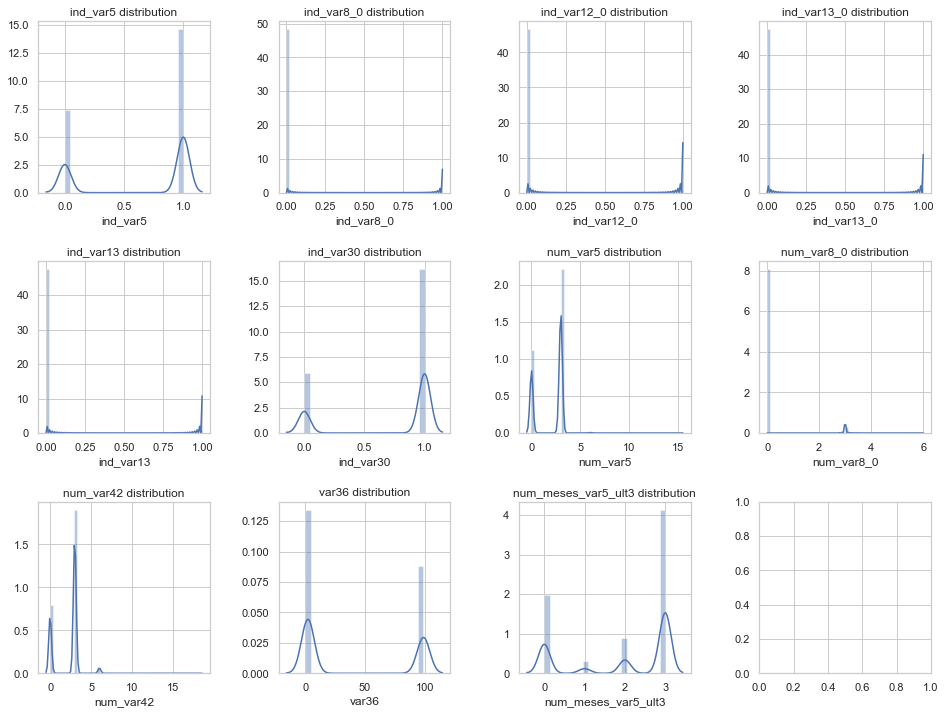

In [27]:
# Features histograms
df = df_train_selected.drop("TARGET", axis=1) 
fig, axs = plt.subplots(ncols=4, nrows=3) 
plt.subplots_adjust(hspace = 0.4, wspace = 0.4) 
fig.set_size_inches(16, 12, forward=True) 
 
count = 0 
 
for i in range(3): 
    for j in range(4): 
        plt.sca(ax=axs[i][j]) 
        if count < df.shape[1]: 
            col = df.columns[count] 
            sns.distplot(df[col], hue = ).set_title(col +' distribution')
        else: 
            break 
             
        count +=1 

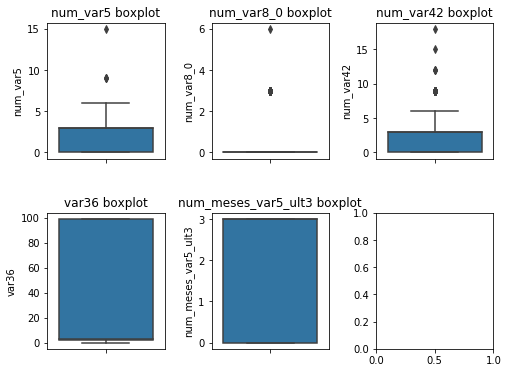

In [92]:
# Features boxplots
df = df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", "num_meses_var5_ult3"]] 
fig, axs = plt.subplots(ncols=3, nrows=2) 
plt.subplots_adjust(hspace = 0.4, wspace = 0.4) 
fig.set_size_inches(8, 6, forward=True) 
 
count = 0 
 
for i in range(2):
    for j in range(3): 
        plt.sca(ax=axs[i][j]) 
        if count < df.shape[1]: 
            col = df.columns[count] 
            sns.boxplot(y=df[col]).set_title(col +' boxplot')
        else: 
            break 
             
        count +=1 

In [2]:
df_train_selected = pd.read_csv("data/df_train_selected.csv")
df_test_selected = pd.read_csv("data/df_test_selected.csv")

#### Bivariate Analysis
###### Checking correlation between numerical variables

(-0.5, 5)

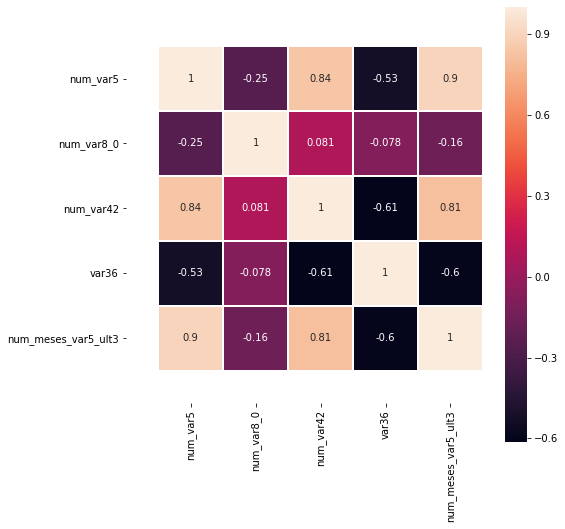

In [85]:
# heat map of correlation values
corr = df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", "num_meses_var5_ult3"]].corr()
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(corr, annot=True, ax=ax, square=True, linewidth=0.5)

plt.yticks(rotation=0)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
ax.set_ylim([len(corr) + 0.5, 0])
ax.set_xlim([-0.5, len(corr)])

###### Print high correlated variables

In [93]:
# Print high correlated variables
corr = df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", \
                                    "num_meses_var5_ult3", "TARGET"]].corr()
# correlated_features = set()

n = len(corr)

[(corr.index[i], corr.columns[j]) for i in range(n-1) for j in range(i+1,n) if abs(corr.iloc[i][j]) >= 0.8]

[('num_var5', 'num_var42'),
 ('num_var5', 'num_meses_var5_ult3'),
 ('num_var42', 'num_meses_var5_ult3')]

###### Getting numerical features distribuition grouped by target variable

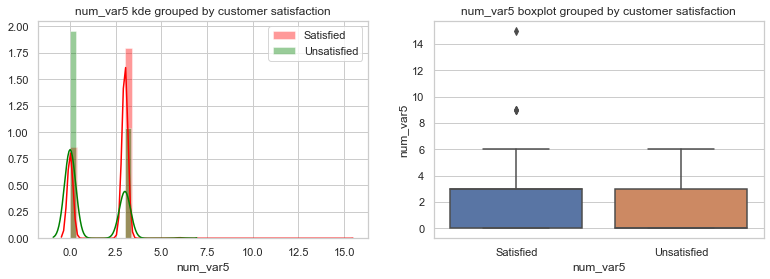

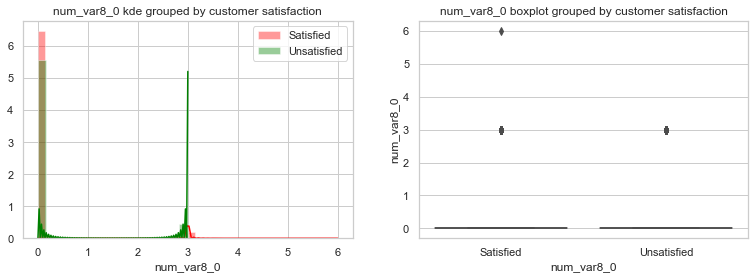

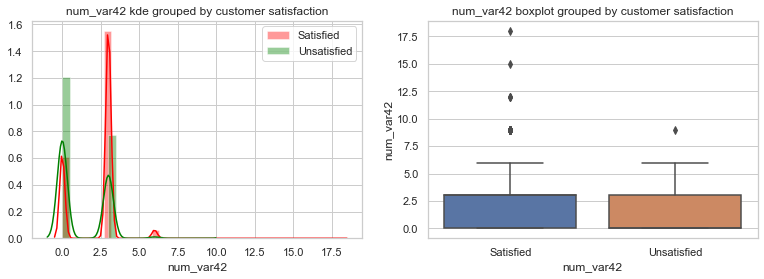

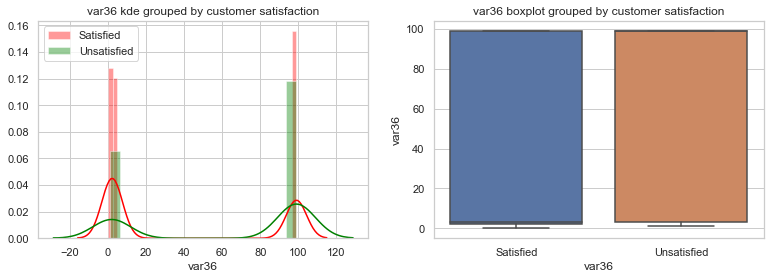

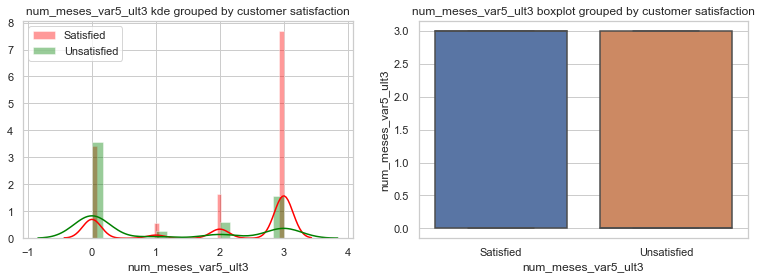

In [24]:
df = df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", \
                                    "num_meses_var5_ult3", "TARGET"]]

for col in df.drop("TARGET", axis=1).columns:
    fig, axs = plt.subplots(ncols=2)
    fig.set_size_inches(13, 4, forward=True)
    sns.distplot(df[df.TARGET == 0][col], color='red', label='Satisfied', ax=axs[0], bins = 40)
    sns.distplot(df[df.TARGET == 1][col], color='green', label='Unsatisfied', ax=axs[0], bins = 18)
    axs[0].legend()
    axs[0].set_xlabel(col)
    axs[0].set_title(col + ' kde grouped by customer satisfaction')
    sns.boxplot(y=col, x="TARGET", data = df, ax=axs[1])
    axs[1].set_xlabel(col)
    axs[1].set_xticklabels(['Satisfied', 'Unsatisfied'])
    axs[1].set_title(col + ' boxplot grouped by customer satisfaction')
    plt.show()

Looking at the graph, some patterns can be noticed:
 - **num_var5**: value 3 presents more satisfied customers than unsatisfied customers.
 - **num_var42**: the value zero concentrates more unsatisfied customers and the value 3 presents a greater number of satisfied customers.
 - **var36**: the zero value has a higher proportion of satisfied customers.
 - **num_meses_var5_ult3**: the higher the value, the greater the proportion of satisfied customers. The value 3 has the highest proportion.

###### Getting categorical features distribuition grouped by target variable

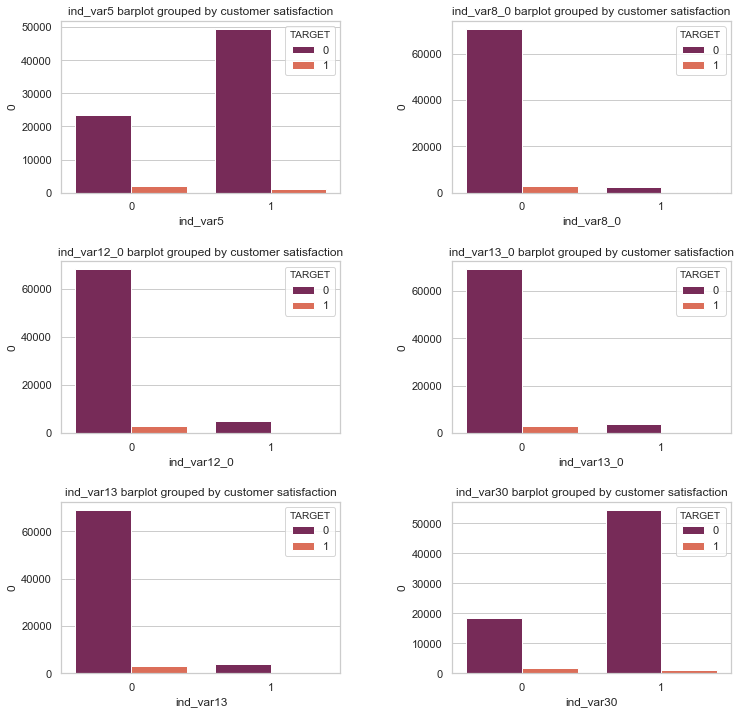

In [72]:
df = df_train_selected[["ind_var5", "ind_var8_0", "ind_var12_0", "ind_var13_0", \
                        "ind_var13", "ind_var30", "TARGET"]]

fig, axs = plt.subplots(ncols=2, nrows=3) 
plt.subplots_adjust(hspace = 0.4, wspace = 0.4) 
fig.set_size_inches(12, 12, forward=True) 

count = 0 

for i in range(3): 
    for j in range(2): 
        plt.sca(ax=axs[i][j]) 
        if count < df.shape[1]: 
            col = df.columns[count] 
            df_g = pd.DataFrame(df.groupby([col, 'TARGET']).size()).reset_index()
            sns.barplot(x=col, y=0, hue="TARGET", data=df_g, palette="rocket")
            axs[i][j].set_xlabel(col)
            axs[i][j].set_title(col + ' barplot grouped by customer satisfaction')
        else: 
            break 
             
        count +=1 

In all selected categorical variables, the number of satisfied customers is significantly higher than that of dissatisfied customers for all variable values.
#### Multivariate Analysis

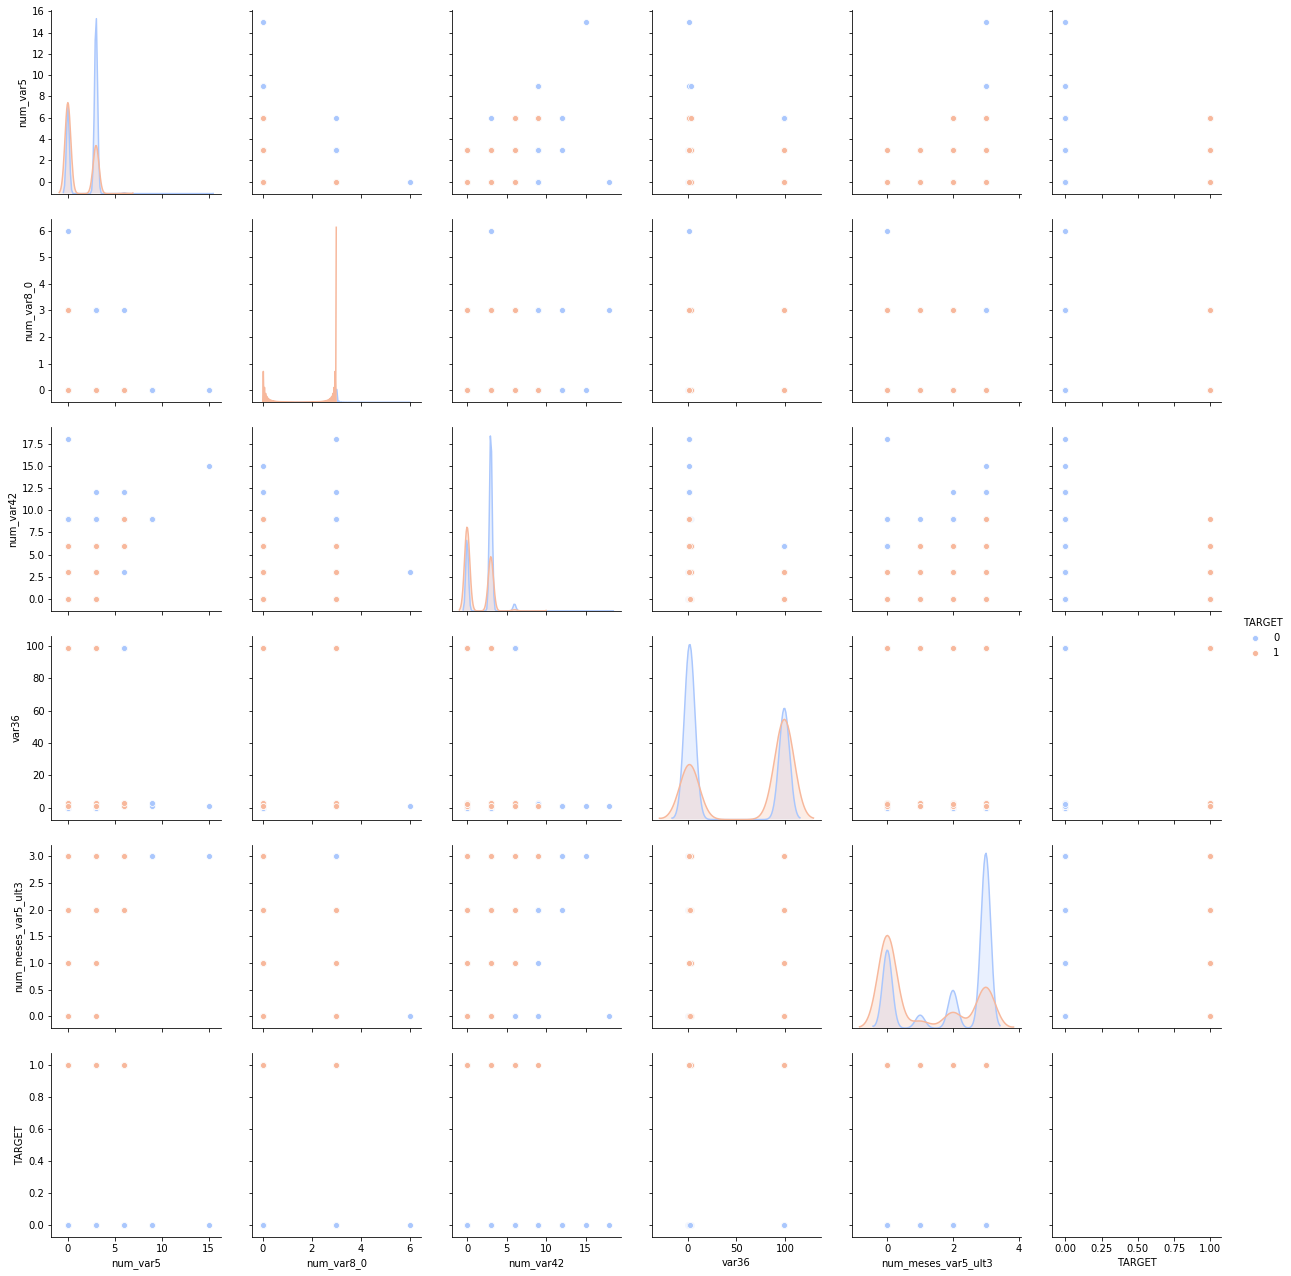

In [88]:
# pairplot matrix groupedby TARGET variable
g = sns.pairplot(df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", \
                                    "num_meses_var5_ult3", "TARGET"]], hue='TARGET', palette='coolwarm')
g.fig.set_size_inches(18,18)

I plotted scatterplots grouped by customer satisfaction for some features to check for pattenrs.

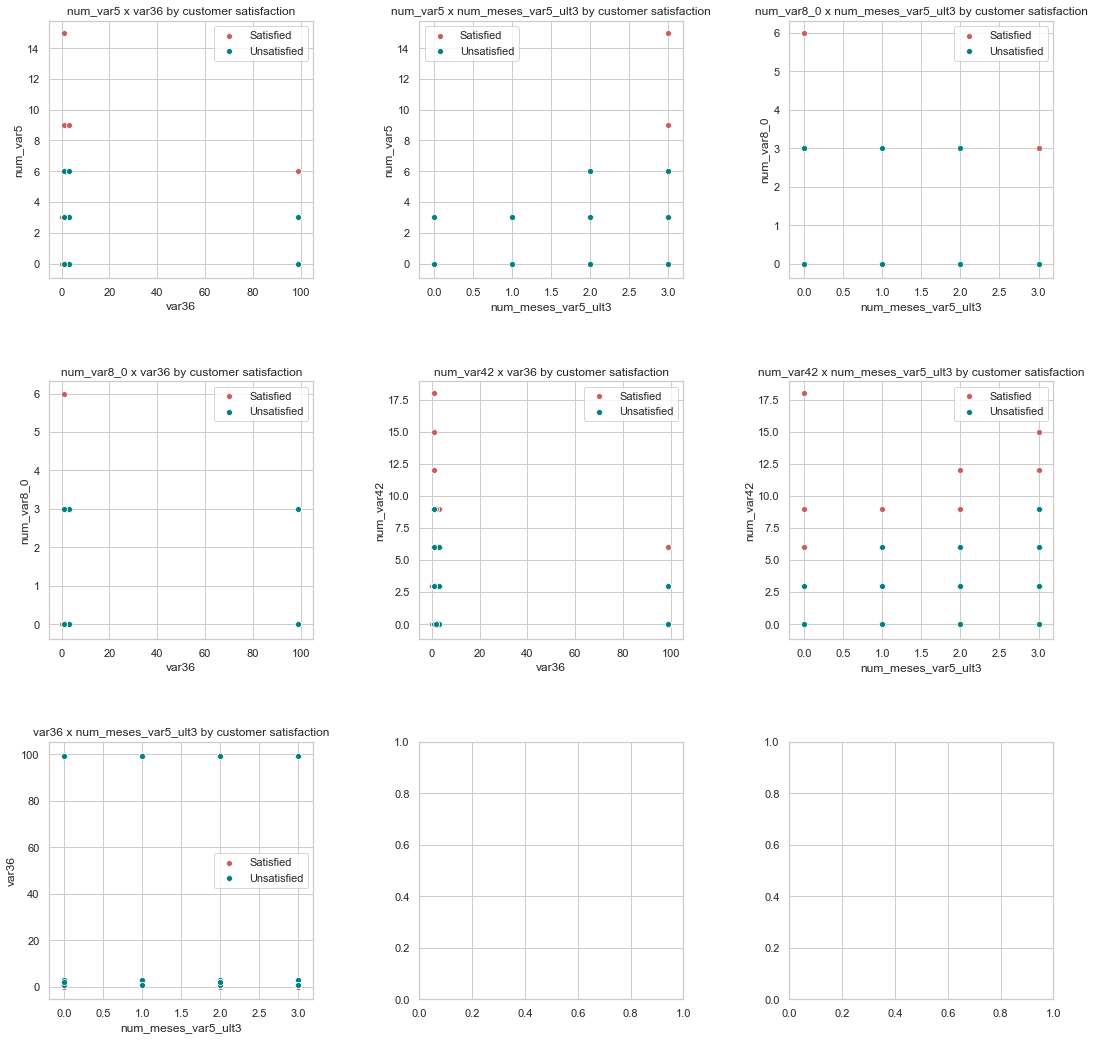

In [98]:
# scatter plots for pairs of features grouped by target variable

df = df_train_selected[["num_var5", "num_var8_0", "num_var42", "var36", \
                                    "num_meses_var5_ult3", "TARGET"]]

pair_list = [("num_var5", "var36"), ("num_var5", "num_meses_var5_ult3"), ("num_var8_0", "num_meses_var5_ult3"), \
             ("num_var8_0", "var36"), ("num_var42", "var36"), ("num_var42", "num_meses_var5_ult3"), \
             ("var36", "num_meses_var5_ult3")]

fig, axs = plt.subplots(ncols=3, nrows=3) 
plt.subplots_adjust(hspace = 0.4, wspace = 0.4) 
fig.set_size_inches(18, 18, forward=True) 

count = 0

for i in range(3): 
    for j in range(3): 
        plt.sca(ax=axs[i][j]) 
        if count < len(pair_list): 
            x = pair_list[count][1]
            y = pair_list[count][0]
            sns.scatterplot(x=x, y=y,  data=df[df.TARGET==0], color='indianred', label = "Satisfied")
            sns.scatterplot(x=x, y=y,  data=df[df.TARGET==1], color='teal', label = "Unsatisfied")
            axs[i][j].set_xlabel(x)
            axs[i][j].set_title(y + ' x ' + x + ' by customer satisfaction')
        else: 
            break 
             
        count +=1

### Removing Highly Correlated Features

I removed the highly correlated independent features. I created a correlation matrix for filter low-correlated features.

In [20]:
correlation_matrix = df_filtered_train.drop("TARGET", axis=1).corr()
correlated_features = set()

[correlated_features.add(rowname) for rowname in correlation_matrix.columns for colname in correlation_matrix.columns if \
correlation_matrix.loc[rowname][colname] > 0.8 and rowname != colname]

df_filter_norm_train = df_filtered_train.drop(labels=correlated_features, axis=1)
df_filter_norm_test = df_filtered_test.drop(labels=correlated_features, axis=1)

In [21]:
df_filter_norm_train.to_csv("data/df_filter_norm_train.csv", index=False)
df_filter_norm_test.to_csv("data/df_filter_norm_test.csv", index=False)

In [24]:
df_train = pd.read_csv("data/df_train.csv")
df_test = pd.read_csv("data/df_test.csv")

In [25]:
df_reduced_train = df_train[list(df_filter_norm_train.columns)]
df_reduced_test = df_test[list(df_filter_norm_train.columns)]

In [26]:
df_reduced_train.to_csv("data/df_reduced_norm_train.csv", index=False)
df_reduced_test.to_csv("data/df_reduced_norm_test.csv", index=False)

The data has many outliers, which make it difficult to respond to their distribution and treatment.

###### Searching for outliers

In [31]:
# Calculating variables z-score
df = df_reduced_train.drop("TARGET", axis=1)
z = np.abs(scipy.stats.zscore(df))

threshold = 3
print(np.where(z > 3))

(array([    4,     4,    13, ..., 76004, 76004, 76004]), array([ 7,  8,  7, ...,  2, 10, 11]))


###### Calculating interquartile range (IQR) for each column for outlier detection

In [32]:
# Getting IQR for each column
df = df_reduced_train.drop("TARGET", axis=1)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

var1          0.0000
var170        0.0000
var183      235.9950
var184        0.0000
var201        0.0000
var202        0.0000
var225        0.0000
var241        0.0000
var242        0.0000
var329       90.0000
var330       12.2175
var338        0.0000
var342        0.0000
var369    50885.6400
dtype: float64


In [33]:
# Printing outliers
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

        var1  var170  var183  var184  var201  var202  var225  var241  var242  \
0      False   False   False   False   False   False   False   False   False   
1      False   False   False   False   False   False    True   False   False   
2      False   False   False   False   False   False   False   False   False   
3      False   False   False   False   False   False   False   False   False   
4      False   False    True   False   False   False   False    True    True   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
76015  False   False   False   False   False   False   False   False   False   
76016  False   False    True   False   False   False   False   False   False   
76017  False   False   False   False   False   False   False   False   False   
76018  False   False   False   False   False   False   False   False   False   
76019  False   False   False   False   False   False   False   False   False   

       var329  var330  var338  var342  

###### Treating outliers

Removing outliers

In [34]:
# Removing based on Z-score
df_train_zscore = df_reduced_train[(z < 3).all(axis=1)]

# Removing based on IQR
df_train_iqr = df_reduced_train[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I checked clean train data distribution to validate outliers. 

I chose to work with IQR removal.

In [37]:
# Removing test data ouliers
df = df_reduced_test.drop("TARGET", axis=1)

# Getting IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_test_iqr = df_reduced_test[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Removing by z-score
# Calculating variables z-score
z = np.abs(scipy.stats.zscore(df))

threshold = 3
df_test_zscore = df_reduced_test[(z < 3).all(axis=1)]

In [38]:
df_train_zscore.to_csv("data/df_train_zscore.csv", index=False)
df_test_zscore.to_csv("data/df_test_zscore.csv", index=False)
df_train_iqr.to_csv("data/df_train_iqr.csv", index=False)
df_test_iqr.to_csv("data/df_test_iqr.csv", index=False)

In [39]:
df_train_iqr = pd.read_csv("data/df_train_iqr.csv")
df_test_iqr = pd.read_csv("data/df_test_iqr.csv")

Checking Target variable

As noted in the graph, target variable is unbalanced.

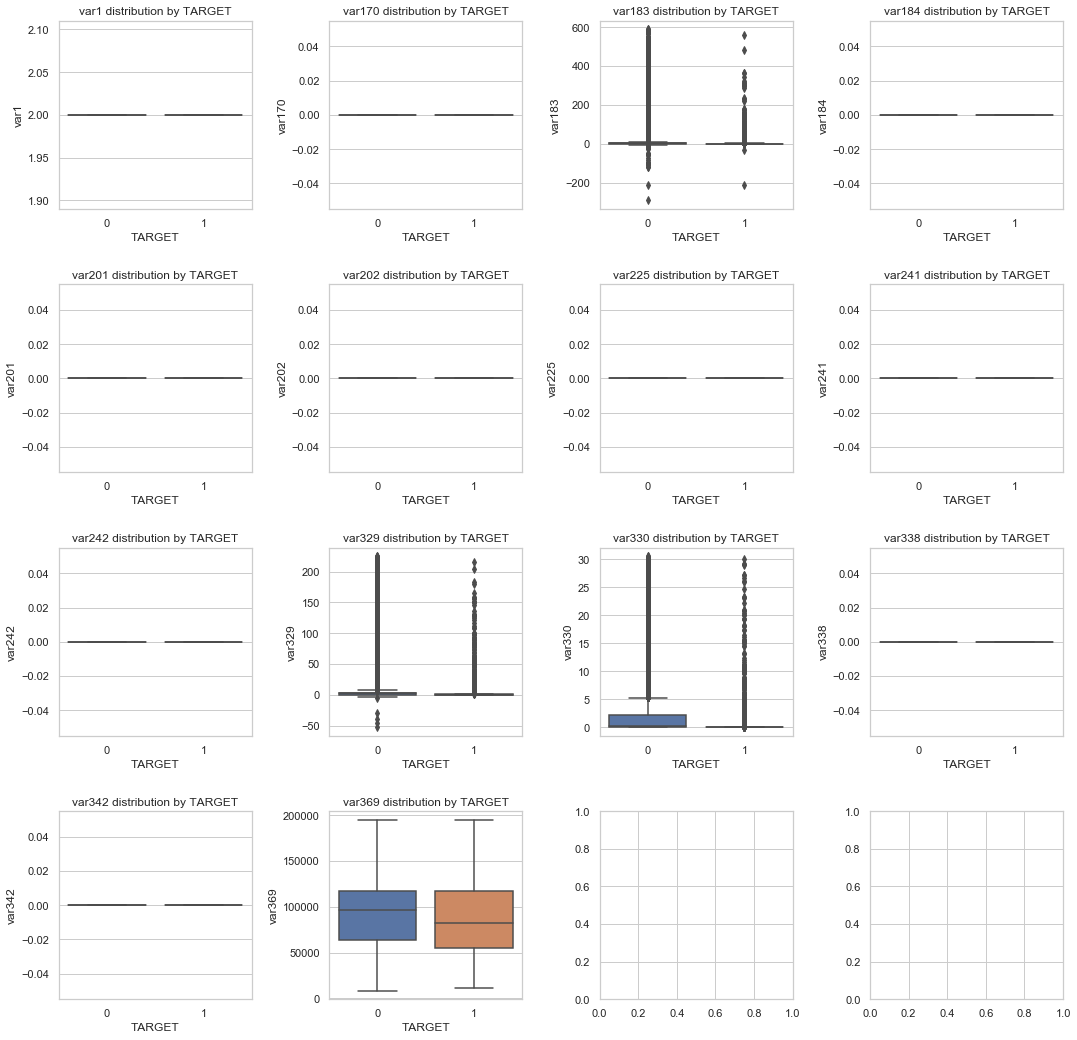

In [95]:
# Checking distribution of variables grouped by the target variable (satisfaction)
fig, axs = plt.subplots(ncols=4, nrows=4)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)
fig.set_size_inches(18, 18, forward=True)
df = df_train_iqr

count = 0

for i in range(4):
    for j in range(4):
        plt.sca(ax=axs[i][j])
        if count < 14:
            col = df.columns[count]
            #sns.boxplot(x="a", hue="b", y="c", data=df_long)
            sns.boxplot(y=col, x="TARGET", data = df).set_title(col +' distribution by TARGET')
        else:
            break
            
        count +=1